# Lab 5: Numerical differentiation

In this lab we will investigate three methods of increasing sophistication to estimate the derivative of a mathematical function. We'll also investigate how to choose the parameters of these methods to get accurate results.

Remember to consult the cheat sheet on QM+ if you're uncertain about the maths involved.

## Coding the three methods

Recall that the simplest possible algorithm, the *forward difference method*, is very similar to the definition of differentiation:

$$
f'(x) = \lim_{x\rightarrow 0}\frac{f(x + h) - f(x)}{h}.
$$

We simply choose a small step $h$ and write

$$
f'(x, h)_\text{FD} = \frac{f(x + h) - f(x)}{h}.
$$

**Write a function `FD(f, x, h)` to return the derivative of some function `f` at `x` using a step size of `h`.**

In [1]:
def FD(f, x, h):
    """Docstring goes here"""
    var_1 = f(x+h) 
    var_2 = f(x) 
    var_3 = h 
    diff = (var_1 - var_2)/var_3 
    return diff

**Check your function** using the sine function (recall that you can `from numpy import sin`) at $x = 0$ and various step sizes.

In [2]:
from numpy import sin 
def f(x): 
    return sin(x) 
FD(f,0,1e-7) 

0.99999999999999833

A more sophisticated algorithm is the *central difference* method, which as we have seen in class eliminates first-order error, so that the error is proportional to $h^2$ rather than $h$. Recall that this method sets

$$
f'(x, h)_\text{CD} = \frac{f(x + \tfrac12h) - f(x - \tfrac12h)}{h}.
$$

**Write a function `CD(f, x, h)` in the same way. Again, you may want to check your function works as expected before proceeding.**

In [3]:
def CD(f,x,h): 
    var_1 = f(x + 0.5*h)
    var_2 = f(x - 0.5*h) 
    var_3 = h 
    diff = (var_1-var_2)/var_3 
    return diff 
CD(f,0,1e-7)

0.99999999999999956

The final method we discussed was the *extrapolated difference* method, in which we combine two iterations of the central difference algorithm to give error proportional to $h^4$:

$$
f'(x, h)_\text{ED} = \tfrac13\big(4f'(x, \tfrac12h)_\text{CD} - f'(x, h)_\text{CD}\big).
$$

**Once again, write a function `ED(f, x, h)` to use this method. It will be easiest to have your function call the `CD` function you've already written.**

In [4]:
def ED(f,x,h): 
    var_1 = CD(f,x,0.5*h) 
    var_2 = CD(f,x,h) 
    diff = (1/3)*(4*var_1 - var_2) 
    return diff 
ED(f,0,1e-7)

1.0

▶ **CHECKPOINT 1**

## Testing the algorithms

Let's test these three algorithms using functions that are easy to differentiate by hand. Specifically, we'll differentiate the functions $\cos(x)$ and $e^x$ at $x = 0.1$, $1$ and $100$.

Initially, you should **pick one function and one point to test it at** from these lists. The following code outline, when complete, will calculate the derivative of a test function at some point using the FD method for a range of step sizes $h$. It will then calculate and print out the relative error $\epsilon$, where
$$
\epsilon = \frac{f'(x)_\text{calculated} - f'(x)_\text{exact}}{f'(x)_\text{exact}},
$$
and finally plot $|\epsilon|$ against $h$ on a log-log plot.

**Complete this code to perform as described.**

▶ **CHECKPOINT 2**

**Then modify it to include the CD and ED algorithms, all plotted on the one figure.**

1e-01  -0.149376  -0.099833    0.496251 
1e-02  -0.104807  -0.099833    0.049816 
1e-03  -0.100331  -0.099833    0.004983 
1e-04  -0.099883  -0.099833    0.000498 
1e-05  -0.099838  -0.099833    0.000050 
1e-06  -0.099834  -0.099833    0.000005 
1e-07  -0.099833  -0.099833    0.000001 
1e-08  -0.099833  -0.099833    0.000000 
1e-09  -0.099833  -0.099833    0.000001 
1e-10  -0.099833  -0.099833    0.000001 
1e-11  -0.099842  -0.099833    0.000090 
1e-12  -0.099920  -0.099833    0.000868 
1e-13  -0.099920  -0.099833    0.000868 
1e-14  -0.099920  -0.099833    0.000868 
1e-15  -0.111022  -0.099833    0.112076 
1e-16  -1.110223  -0.099833   10.120756 
1e-17 -11.102230  -0.099833  110.207556 


<IPython.core.display.Javascript object>


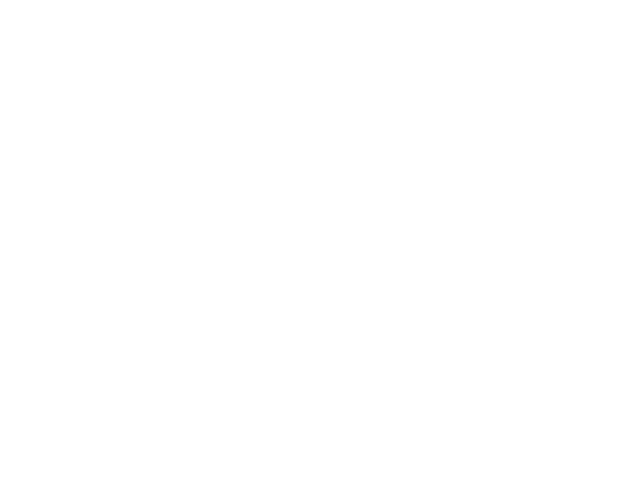

In [5]:
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

test_f = cos   # choose an appropriate function here
x0 = 0.1       # where will we evaluate this function?
fx0p = -sin(0.1)    # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = []
# We will collect the epsilon values for the FD method in this list. 
# You may like to set up similar lists for other methods.

for h in hh:
    fd_estimate = FD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    fd_error = (fd_estimate - fx0p )/ (fx0p)    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}  {:10.6f} ".format(h, fd_estimate,fx0p,fd_error))
    # Modify this as needed to print out results for other methods.
    
    fd_errors.append(abs(fd_error))
    # We append the absolute value of epsilon to our list of errors.

loglog(hh, fd_errors, 'o-', label="FD") # Same syntax as plot. The label is used in the legend.
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')

title('Relative error in the numerical first differential of a function')# include an appropriate string for a graph title here.
legend()

  h    fd_estimate fd_error 
1e-01   1.162318   0.051709
1e-02   1.110715   0.005017
1e-03   1.105724   0.000500
1e-04   1.105226   0.000050
1e-05   1.105176   0.000005
1e-06   1.105171   0.000000
1e-07   1.105171   0.000000
1e-08   1.105171  -0.000000
1e-09   1.105171  -0.000000
1e-10   1.105169  -0.000001
1e-11   1.105160  -0.000010
1e-12   1.105116  -0.000050
1e-13   1.103562  -0.001456
1e-14   1.088019  -0.015520
1e-15   1.110223   0.004571
1e-16   0.000000  -1.000000
1e-17   0.000000  -1.000000
  h    cd_estimate cd_error 
1e-01   1.105631   0.000417
1e-02   1.105176   0.000004
1e-03   1.105171   0.000000
1e-04   1.105171   0.000000
1e-05   1.105171  -0.000000
1e-06   1.105171   0.000000
1e-07   1.105171   0.000000
1e-08   1.105171  -0.000000
1e-09   1.105171  -0.000000
1e-10   1.105172   0.000001
1e-11   1.105183   0.000011
1e-12   1.105116  -0.000050
1e-13   1.105782   0.000553
1e-14   1.088019  -0.015520
1e-15   1.110223   0.004571
1e-16   2.220446   1.009143
1e-17   0.000000  

<IPython.core.display.Javascript object>


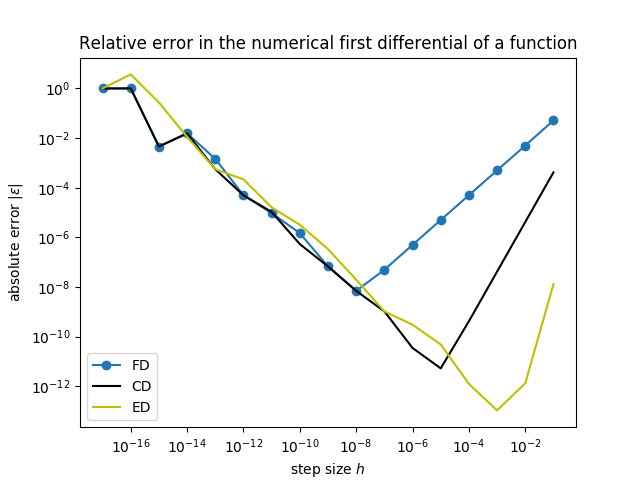

In [8]:
# all three 
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

test_f = exp   # choose an appropriate function here
x0 = 0.1       # where will we evaluate this function?
fx0p = exp(0.1)    # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.
cd_errors = []
fd_errors = [] 
ed_errors = []
# We will collect the epsilon values for the FD method in this list. 
# You may like to set up similar lists for other methods.
print("{:^5}  {:^6} {:^6} ".format("h", "fd_estimate", "fd_error"))

for h in hh:
    fd_estimate = FD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    
    fd_error = (fd_estimate - fx0p )/ (fx0p)    
    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, fd_estimate, fd_error))
    # Modify this as needed to print out results for other methods.
    
    fd_errors.append(abs(fd_error)) 
    
    # We append the absolute value of epsilon to our list of errors.
print("{:^5}  {:^6} {:^6} ".format("h","cd_estimate", "cd_error"))
for h in hh:
    cd_estimate = CD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    
    cd_error = (cd_estimate - fx0p )/ (fx0p)    
    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, cd_estimate, cd_error))
    # Modify this as needed to print out results for other methods.
    
    cd_errors.append(abs(cd_error)) 
    
    # We append the absolute value of epsilon to our list of errors.
print("{:^5}  {:^6} {:^6} ".format("h","ed_estimate", "ed_error"))    
for h in hh:
    ed_estimate = ED(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    
    ed_error = (ed_estimate - fx0p )/ (fx0p)    
    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, ed_estimate, ed_error))
    # Modify this as needed to print out results for other methods.
    
    ed_errors.append(abs(ed_error)) 
    
    # We append the absolute value of epsilon to our list of errors.
    
loglog(hh, fd_errors, 'o-', label="FD") # Same syntax as plot. The label is used in the legend.
loglog(hh, cd_errors, 'k-', label="CD") 
loglog(hh, ed_errors, 'y-', label="ED")
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')

title('Relative error in the numerical first differential of a function')# include an appropriate string for a graph title here.
legend()

1e-01  -0.149376   0.496251
1e-02  -0.104807   0.049816
1e-03  -0.100331   0.004983
1e-04  -0.099883   0.000498
1e-05  -0.099838   0.000050
1e-06  -0.099834   0.000005
1e-07  -0.099833   0.000001
1e-08  -0.099833   0.000000
1e-09  -0.099833   0.000001
1e-10  -0.099833   0.000001
1e-11  -0.099842   0.000090
1e-12  -0.099920   0.000868
1e-13  -0.099920   0.000868
1e-14  -0.099920   0.000868
1e-15  -0.111022   0.112076
1e-16  -1.110223  10.120756
1e-17 -11.102230 110.207556


<IPython.core.display.Javascript object>


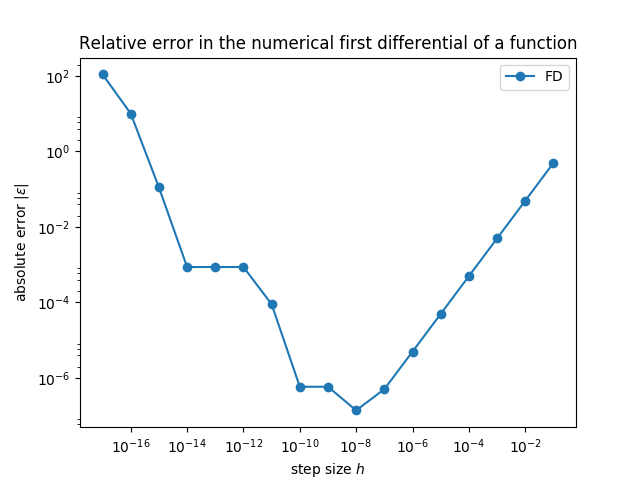

In [7]:
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

test_f = cos   # choose an appropriate function here
x0 = 0.1       # where will we evaluate this function?
fx0p = -sin(0.1)    # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = [] 

# We will collect the epsilon values for the FD method in this list. 
# You may like to set up similar lists for other methods.

for h in hh:
    fd_estimate = FD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    fd_error = (fd_estimate - fx0p )/ (fx0p)    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, fd_estimate, fd_error))
    # Modify this as needed to print out results for other methods.
    
    fd_errors.append(abs(fd_error))
    # We append the absolute value of epsilon to our list of errors.

loglog(hh, fd_errors, 'o-', label="FD") # Same syntax as plot. The label is used in the legend.
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')

title('Relative error in the numerical first differential of a function')# include an appropriate string for a graph title here.
legend()

In [ ]:
#test

**Where is each algorithm most accurate? Can you identify which sorts of error occur elsewhere?**

▶ **CHECKPOINT 3**

## Extension: *Imaginary step* algorithm

The *imaginary step* algorithm is

$$
f'(x, h)_\text{IS} = \frac{\mathrm{Im}\{x + \mathrm{i}h\}}{h}
$$

where $\mathrm{Im}$ represents the imaginary part of a number; this only works if $f$ is a *real* function. This looks extraordinarily bizarre on the face of it, but can be shown to work using Taylor series in much the same way as we did in class for the other algorithms.

**Code a function `IS(f, x, h)` to calculate the derivative using this method. Is it more or less accurate than the other methods we have discussed? Can you see why?**

*Hint*: The number $2 + 3\mathrm{i}$ is written in Python as `2 + 3j`. If `z` is a complex number in Python, its imaginary part is `z.imag`. 

For more information about this algorithm, you might like to see [this informal blog post](https://sinews.siam.org/Details-Page/differentiation-without-a-difference) or a [more formal paper](http://mdolab.engin.umich.edu/sites/default/files/Martins2003CSD.pdf) (section 2.1 is most relevant for our purposes).

In [27]:
def FD(f, x, h):
    """Docstring goes here"""
    var_1 = f(x+h) 
    var_2 = f(x) 
    var_3 = h 
    diff = (var_1 - var_2)/var_3 
    return diff 
def n(x): 
    return sin(x**2) 
x = 0.1
h = 3e-8
print(FD(n,x,h))

x = 0.1 
h = 3e-7
print(FD(n,x,h))

0.199990030034
0.199990300003


In [29]:
def CD(f,x,h): 
    var_1 = f(x + 0.5*h)
    var_2 = f(x - 0.5*h) 
    var_3 = h 
    diff = (var_1-var_2)/var_3 
    return diff  
def n(x): 
    return sin(x**2) 
def np(x): 
    return 2*x*cos(x**2)

x = 0.1
h = 3e-5
print(0.2 - CD(n,x,h))

x = 0.1 
h = 3e-4
print(0.2 - CD(n,x,h))

x = 0.1
h = 3e-6
print(CD(n,x,h))

9.99991741851e-06
9.99999167042e-06
0.199990000084


1e-01   0.299895   0.199990    0.499550 
1e-02   0.209987   0.199990    0.049988 
1e-03   0.200990   0.199990    0.004999 
1e-04   0.200090   0.199990    0.000500 
1e-05   0.200000   0.199990    0.000050 
1e-06   0.199991   0.199990    0.000005 
1e-07   0.199990   0.199990    0.000000 
1e-08   0.199990   0.199990    0.000000 
1e-09   0.199990   0.199990    0.000000 
1e-10   0.199990   0.199990   -0.000000 
1e-11   0.199990   0.199990    0.000000 
1e-12   0.199989   0.199990   -0.000003 
1e-13   0.199996   0.199990    0.000031 
1e-14   0.200014   0.199990    0.000118 
1e-15   0.199493   0.199990   -0.002484 
1e-16   0.190820   0.199990   -0.045854 
1e-17   0.173472   0.199990   -0.132595 


<IPython.core.display.Javascript object>


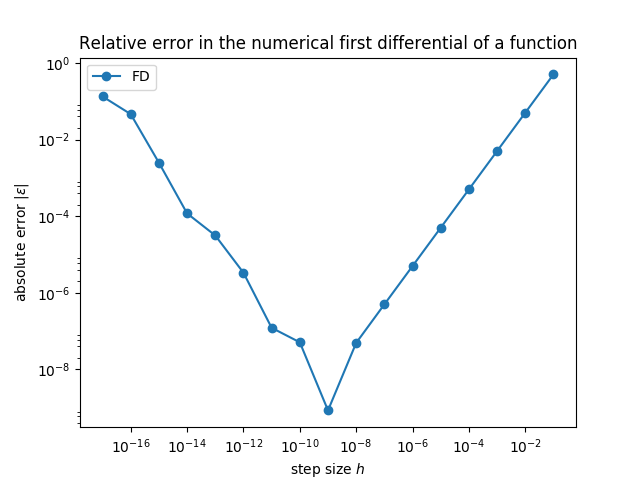

In [32]:
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

test_f = n   # choose an appropriate function here
x0 = 0.1       # where will we evaluate this function?
fx0p = np(0.1)   # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.

fd_errors = []
# We will collect the epsilon values for the FD method in this list. 
# You may like to set up similar lists for other methods.

for h in hh:
    fd_estimate = FD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    fd_error = (fd_estimate - fx0p )/ (fx0p)    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}  {:10.6f} ".format(h, fd_estimate,fx0p,fd_error))
    # Modify this as needed to print out results for other methods.
    
    fd_errors.append(abs(fd_error))
    # We append the absolute value of epsilon to our list of errors.

loglog(hh, fd_errors, 'o-', label="FD") # Same syntax as plot. The label is used in the legend.
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')

title('Relative error in the numerical first differential of a function')# include an appropriate string for a graph title here.
legend()

In [ ]:
# all three 
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook

test_f = exp   # choose an appropriate function here
x0 = 0.1       # where will we evaluate this function?
fx0p = exp(0.1)    # put the true value of the derivative of test_f at x0 here

hh = logspace(-1, -17, 17) # same syntax as linspace: this gives us a range from 10^-1 to 10^-17 with 17 points.
cd_errors = []
fd_errors = [] 
ed_errors = []
# We will collect the epsilon values for the FD method in this list. 
# You may like to set up similar lists for other methods.
print("{:^5}  {:^6} {:^6} ".format("h", "fd_estimate", "fd_error"))

for h in hh:
    fd_estimate = FD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    
    fd_error = (fd_estimate - fx0p )/ (fx0p)    
    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, fd_estimate, fd_error))
    # Modify this as needed to print out results for other methods.
    
    fd_errors.append(abs(fd_error)) 
    
    # We append the absolute value of epsilon to our list of errors.
print("{:^5}  {:^6} {:^6} ".format("h","cd_estimate", "cd_error"))
for h in hh:
    cd_estimate = CD(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    
    cd_error = (cd_estimate - fx0p )/ (fx0p)    
    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, cd_estimate, cd_error))
    # Modify this as needed to print out results for other methods.
    
    cd_errors.append(abs(cd_error)) 
    
    # We append the absolute value of epsilon to our list of errors.
print("{:^5}  {:^6} {:^6} ".format("h","ed_estimate", "ed_error"))    
for h in hh:
    ed_estimate = ED(test_f,x0,h)#calculate the estimated derivative with the FD method here.
    # And perhaps for other methods...
    
    
    ed_error = (ed_estimate - fx0p )/ (fx0p)    
    
    # And perhaps for other methods...
    
    print("{:5.0e} {:10.6f} {:10.6f}".format(h, ed_estimate, ed_error))
    # Modify this as needed to print out results for other methods.
    
    ed_errors.append(abs(ed_error)) 
    
    # We append the absolute value of epsilon to our list of errors.
    
loglog(hh, fd_errors, 'o-', label="FD") # Same syntax as plot. The label is used in the legend.
loglog(hh, cd_errors, 'k-', label="CD") 
loglog(hh, ed_errors, 'y-', label="ED")
xlabel('step size $h$') # Note that we can include LaTeX-style maths within dollar signs.
ylabel('absolute error $|\epsilon|$')

title('Relative error in the numerical first differential of a function')# include an appropriate string for a graph title here.
legend()